<a href="https://colab.research.google.com/github/samaneh-m/TU-deep-Learning/blob/main/three_layer_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning - Handcrafted two layer network

Author: Niklas Strahmann

🔹 Implement a fully connected three layer network by hand. Fill in the missing code!

---

## Imports

This notebook was created for `torch 2.6` .

In [1]:
import torch
import plotly.express as px

from helper import *

In this notebook, the goal is to solve a regression task, i.e. for a Dataset $\mathcal{D} = \{(X_i, y_i)\}$, find an $f$ such that $f(X_i) = y_i$.
To do this, we start by loading the data from the file and split it into a subset used for training, and a subset which we later use for testing.

We can visualize the training data. Don't look at the test data, we want to train our model without any knowledge of the test data!

In [8]:
d = torch.load("regression.pt")
print(type(d))
print(d.keys())


<class 'dict'>
dict_keys(['X', 'y', 'mask'])


In [16]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def split_data(d, test_size=0.2): #d is dictionary holding the data
    x = d['X']   #getting the input features (often called X) from the dictionary d.
    y = d['y']   #getting the label from dictionary
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  #random_state=42, the split will always be the same every time you run the code
    return x_train, y_train, x_test, y_test

d = torch.load("regression.pt")
x_train, y_train, x_test, y_test = split_data(d)

## Network Architecture

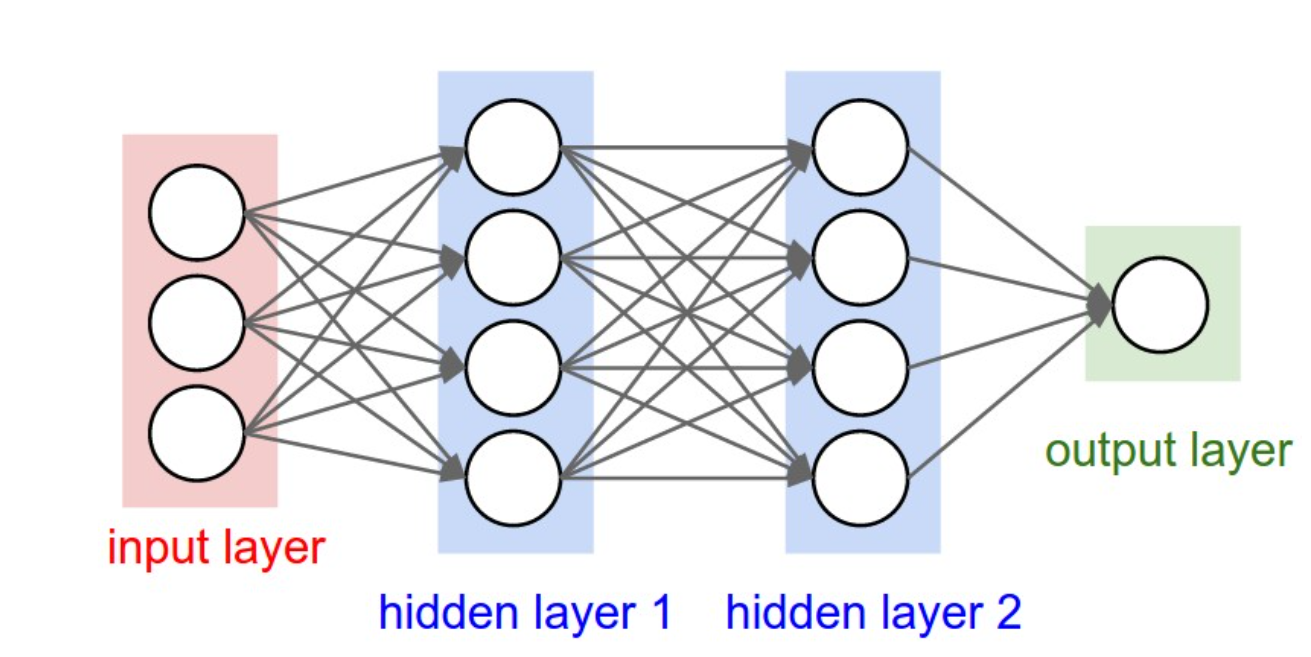



To approximate a function $f$, we use a neural network with three layers. A three-layer network computes a prediction $\hat{Y}$ from input $X$ using the expression:

$$
\hat{Y} = \sigma( \sigma(X W_1 + b_1) W_2 + b_2) W_3 + b_3 ~.
$$

Here, we use the convention $X W$ (instead of $W X$), meaning that each row of $X$ corresponds to a separate data point.

The activation function $\sigma$ is applied element-wise. In this case, we use the ReLU function:

$$
\text{ReLU}(x) = \max(0, x) ~.
$$

The architecture is defined by four scalars:
- input size $i$
- hidden layer sizes $h_1, h_2$
- output size $o$

While $i$ and $o$ are determined by the task, the hidden sizes $h_1$ and $h_2$ are tunable hyperparameters.

Given these, the shapes of the network's weight parameters are:

- $W_1 \in \mathbb{R}^{i \times h_1}$
- $b_1 \in \mathbb{R}^{h_1}$
- $W_2 \in \mathbb{R}^{h_1 \times h_2}$
- $b_2 \in \mathbb{R}^{h_2}$
- $W_3 \in \mathbb{R}^{h_2 \times o}$
- $b_3 \in \mathbb{R}^{o}$

For a batch of $N$ input samples, the input tensor has shape:

$$
X \in \mathbb{R}^{N \times i}
$$

and the resulting predictions have shape:

$$
\hat{Y} \in \mathbb{R}^{N \times o}
$$


## Training the Network

To train the network, we use the gradient descent algorithm to minimize a loss $\mathcal{L}$. We use the *Mean Square Error*:
$$ MSE(Y, \hat{Y}) = \frac{1}{N} \sum_{i=1}^N (Y - \hat{Y})^2 ~.
$$

We also employ L2 regularization for the weights $W_i$ (but not the biases!), where the L2 norm of the weight parameters is added to the data loss. This is scaled by a small regularization parameter $\lambda$:

$$ \mathcal L = MSE(Y, \hat{Y}) + \lambda \sum_i || W_i ||_2^2 $$

Gradient descent works by calculating the gradient for each parameter $\theta$ and updating it with a small learning rate $\alpha$:

$$ \theta_{t+1} = \theta_t - \alpha \frac{\partial \mathcal{L}}{\partial \theta} $$

This procedure is repeated for a given amount of Epochs $T$.

To calculate the gradient of a given parameter, use *backpropagation*, where you start from the end of the calculation and utilize the chain rule to pass back the *upstram gradient* to multiply it with the *local* gradient. In this way, calculating the *downstream gradient* and pass is to the next step:

$$ \frac{\partial \mathcal{L}}{\partial \theta} = \frac{\partial Z}{\partial \theta} \frac{\partial \mathcal{L} }{\partial Z} $$

In this case, $Z=g(\theta)$ is a local step.

---

Task: Complete the `ThreeLayerNet` class step by step by following the subtasks below. For each subtask, there is a test to verify your solution. Use only the methods given in each subtask! Don't use `torch.functional` or `torch.Tensor.backward` ! If you have questions about the methods, use the [documentation](https://pytorch.org/docs/2.6).


In [ ]:
class ThreeLayerNet:
    def __init__(self, input_size: int, hidden_size:int, hidden_size_2:int, output_size:int):

        self.params = {} #create a dictionary
        W1 = self.params['W1'] = torch.randn(input_size, hidden_size) #W1 is a key or string / they act like label in dictionary
        W2 = self.params['W2'] = torch.randn(hidden_size, hidden_size_2)
        W3 = self.params['W3'] = torch.randn(hidden_size_2, output_size)
        b1 = self.params['b1'] = torch.zeros(hidden_size)
        b1 = self.params['b2'] = torch.zeros(hidden_size_2)
        b1 = self.params['b3'] = torch.zeros(output_size)
        ############
        ### TODO complete task a
        ### initialize the weights with a normal distribution and biases as zero

        ############

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        """
        Perform a forward pass through the network.
        :param X: Data batch with shape (N, input_size)
        :return: Output batch with shape (N, output_size)
        """
        Z1 = X @ self.params['W1'] + self.params['b1']
        A1 = torch.maximum(Z1, torch.zeros_like(Z1))  # ReLU activation
        #second layer Z2 = A1 @ W2 + b2, A2 = ReLU(Z2)
        Z2 = A1 @ self.params['W2'] + self.params['b2']
        A2 = torch.maximum(Z2, torch.zeros_like(Z2))
        #third layer Z3 = A2 @ W3 + b3, A3 = Z3 (no activation)
        Z3 = A2 @ self.params['W3'] + self.params['b3']
        Y = Z3
        ############
        # TODO complete task b
        # implement a forward pass

        ############
        return Y

    def loss(self, Y_hat: torch.Tensor, Y:torch.Tensor, reg=0.0, return_grad=False):
        """
        Calculate the MSE loss with L2 regularization between the network output and the target.
        :param Y_hat: Network output
        :param Y: Target output
        :param reg: regularization strength
        :param return_grad: If `True`, returns the gradient of the loss with respect to the network output
        :return: `loss` or tuple `(loss, gradient)`
        """
        N = len(Y_hat)
        Y_hat = Y_hat.view(N, -1)
        Y = Y.view(N, -1)

        ############
        # TODO complete task c
        # calculate (only) the loss
        # MSE loss: (1/N) * sum((Y_hat - Y)^2)
        mse_loss = torch.mean((Y_hat - Y) ** 2)
        # L2 regularization: lambda * (||W1||_2^2 + ||W2||_2^2 + ||W3||_2^2)
        l2_loss = reg * (torch.norm(self.params['W1']) ** 2 + torch.norm(self.params['W2']) ** 2 + torch.norm(self.params['W3']) ** 2)
        # total loss
        loss = mse_loss + l2_loss

        ############
        grad = None
        if return_grad is False:
            # Gradient of MSE loss: (2/N) * (Y_hat - Y)
             grad = (2 / N) * (Y_hat - Y)

        ############
        # TODO complete task d
        # calculate the gradient of the loss wrt to the network output

        ############
        return loss, grad

    def grads(self, X: torch.Tensor, Y: torch.Tensor, reg:float) -> tuple[torch.Tensor, dict[torch.Tensor]]:
        """
        Perform a forward pass, calculate the loss and perform a backward pass through the network.
        :param X: Input data, shape: (N, input_size)
        :param Y: Target data, shape: (N, )
        :param reg: regularization strength
        :return: tupel `(loss, gradient)` where gradient is a dict containing the gradient of the loss w.r.t. to all weight parameters
        """

        # Forward pass (store intermediates)
        Z1 = X @ self.params['W1'] + self.params['b1']  # (N, h1)
        A1 = torch.maximum(Z1, torch.zeros_like(Z1))     # (N, h1)
        Z2 = A1 @ self.params['W2'] + self.params['b2']  # (N, h2)
        A2 = torch.maximum(Z2, torch.zeros_like(Z2))     # (N, h2)
        Y_hat = A2 @ self.params['W3'] + self.params['b3']  # (N, 1)
        # Compute loss and gradient w.r.t. Y_hat
        loss, dY_hat = self.loss(Y_hat, Y, reg, return_grad=True)  # dY_hat: (N, 1)
        grads = {}

        # Backward pass
        #layer 3 dY_hat = A2 @ W3 + b3
        grads['W3'] = (A2.T @ dY_hat) + 2 * reg * self.params['W3']
        grads['b3'] = torch.sum(dY_hat, dim=0)
        dA2 = dY_hat @ self.params['W3'].T
        #layer 2
        dZ2 = dA2 * (Z2 > 0).float()
        grads['W2'] = A1.T @ dZ2 + 2 * reg * self.params['W2']
        grads['b2'] = torch.sum(dZ2, dim=0)
        dA1 = dZ2 @ self.params['W2'].T
        #layer 1
        dZ1 = dA1 * (Z1 > 0).float()
        grads['W1'] = X.T @ dZ1 + 2 * reg * self.params['W1']
        grads['b1'] = torch.sum(dZ1, dim=0)
        ############
        # TODO complete task e
        # calculate the gradients for all parameters with backpropagation
        # if you need to use intermediate results from the forward pass, reimplement it here to have access to them
        # with the prediction given by the forward pass, use the loss function from task d

        ############
        return loss, grads

    def update_weights(self, grad: dict[torch.Tensor], learning_rate=0.01):
        """
        Update the weight parameters with gradient descent
        :param grad: dict containing the gradients for all parameters
        :param learning_rate: learning rate for updating the weights
        :return:
        """
        ############
        # TODO complete task f
        # update the parameters with gradient descent
        for key in self.params:
            self.params[key] -= learning_rate * grad[key]
        ############

    # Use this method to verify the parameters of your network
    def debug(self):
        for k, v in self.params.items():
            print(f"{k}: shape:{v.shape}, tpye:{v.dtype}")

### Task a
 Initialize the weight parameters in the constructor. Initalize the weights $W$ with a normal distribution and the bias $b$ as zero.

Use the methods `torch.randn` and `torch.zeros`.

In [ ]:
#from helper import test_initialization
net = ThreeLayerNet(2,10, 5, 1)
test_initialization(net)

All tests passed


### Task b
 Implement the forward pass in the network, which calculates $\hat{Y}$.

You use `torch.maximum`, also note that matrix multiplication is done as `a @ b`.

In [ ]:
net = ThreeLayerNet(2, 10, 5, 1)
test_forward(net)

All tests passed


### Task c
 Start to implement the loss function. For now, only implement the loss. Don't forget the L2 regularization!

Hint: Make sure you understand the difference a $(D \times 1)$ tensor and a $(D,)$ tensor makes for your calculations.

Use the method `torch.sum`.

In [ ]:
net = ThreeLayerNet(2, 10, 5, 1)
test_loss(net)

AssertionError: There was an error while calculating the loss.

### Task d
 Complete the loss function, by calculating the gradient $\frac{\partial \mathcal{L}}{\partial \hat{Y}}$ and return the tupel `loss, dloss` when the argument `return_grad=True`is given.

You don't need torch functions to complete this task.

In [ ]:
net = ThreeLayerNet(2, 10, 5, 1)
test_loss_grad(net)

### Task e
 Implement the grad function, which calculates a forward path, then use the `loss` method to obtain the gradient w.r.t. $\hat{Y}$. Use backpropagation to calculate the gradient for all weights and return them in a dictionary, similar to `params`.

Hints:
- You may find it useful to reimplement the forward pass to be able to store and access intermediate values for calculating the gradients.
- When implementing the gradient for the L2 regularization, it does not depend on the gradient of the loss!

Use the methods `torch.maximum` when reimplemeting the forward pass and `torch.sum`.

In [ ]:
net = ThreeLayerNet(2, 10, 5, 1)
test_grads(net)

TypeError: unsupported operand type(s) for @: 'Tensor' and 'NoneType'

### Task f
 Use the gradients to update the parameters with gradient descent.


In [ ]:
net = ThreeLayerNet(2, 10, 5, 1)
test_weight_update(net)

All tests passed


### Task g
 Complete the training loop below by first creating a batch of size `BATCH_SIZE`, then calculate the gradients and updating the weights. Store the epoch-wise sum of losses in the `epoch_loss` variable. We will use it to visualize how the loss changes during training.

For this task, we provide you with all hyperparameters for network architecture and training. If the training loop takes too long to execute, you may lower the training duration by adjusting the number of epochs.

Use the method `torch.randperm` to create a mask for your batch.

In [ ]:
N = len(x_train)

EPOCHS =  2000

BATCH_SIZE = 5000
LEARNING_RATE = 2e-3
REGULARIZATION_STRENGTH = 1e-3

HIDDEN_DIM_1 = 32
HIDDEN_DIM_2 = 32


net = ThreeLayerNet(2, HIDDEN_DIM_1, HIDDEN_DIM_2, 1)
loss_history = torch.empty(EPOCHS)

for t in range(EPOCHS):

    epoch_loss = 0
    for b in range(N // BATCH_SIZE):
        ############
        # TODO complete task g
        # create a batch from the dataset, then calculate the gradients and update the weights
        for b in range(N // BATCH_SIZE):
            BATCH_indices = indices[b * BATCH_SIZE:(b + 1) * BATCH_SIZE]
            x_batch = x_train[BATCH_indices]
            y_batch = y_train[BATCH_indices]
            loss, grads = net.grads(x_batch, y_batch, REGULARIZATION_STRENGTH)
            net.update_weights(grads, LEARNING_RATE)
            epoch_loss += loss.item()
        ############
    loss_history[t] = epoch_loss

px.line(x=torch.arange(EPOCHS), y=loss_history, log_y=True, title="Training Loss").show()

prediction = net.forward(x_test)
test_loss = net.loss(prediction, y_test)

scatter3d(x_test, prediction, title="Network Prediction for Test Data").show()
print(f"MSE on the test data: {test_loss}")




NameError: name 'indices' is not defined

We can also compare the prediction with the real data on the complete data.

In [ ]:
y_plot = net.forward(x)
surface3d(x, y).show()
surface3d(x, y_plot, "Network approximation").show()

We can also visualize the error at the datapoints (given by their color).

In [ ]:
prediction = net.forward(x_test)
epoch_loss = net.loss(prediction, y_test)

e = prediction.view(-1) - y_test
px.scatter_3d(x=x_test[:,0], y=x_test[:,1], z=prediction.view(-1), color=e.abs().view(-1), color_continuous_scale="YlOrRd", title="Test Data Prediction with errors ").show()
